In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import pickle
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

from src.models.prediction import predict, train_and_predict
from src.models.evaluation import get_mse

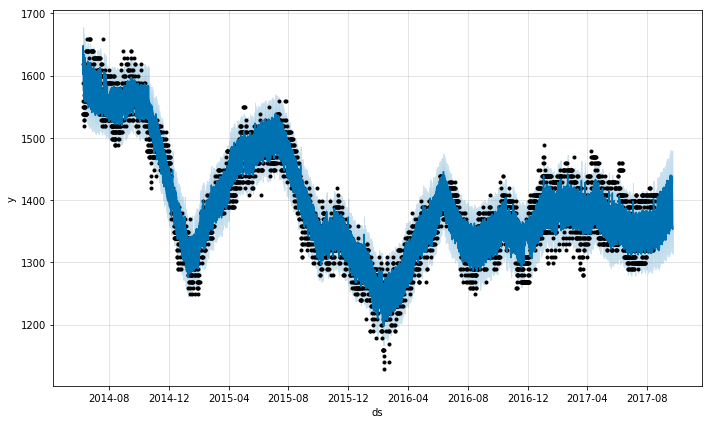

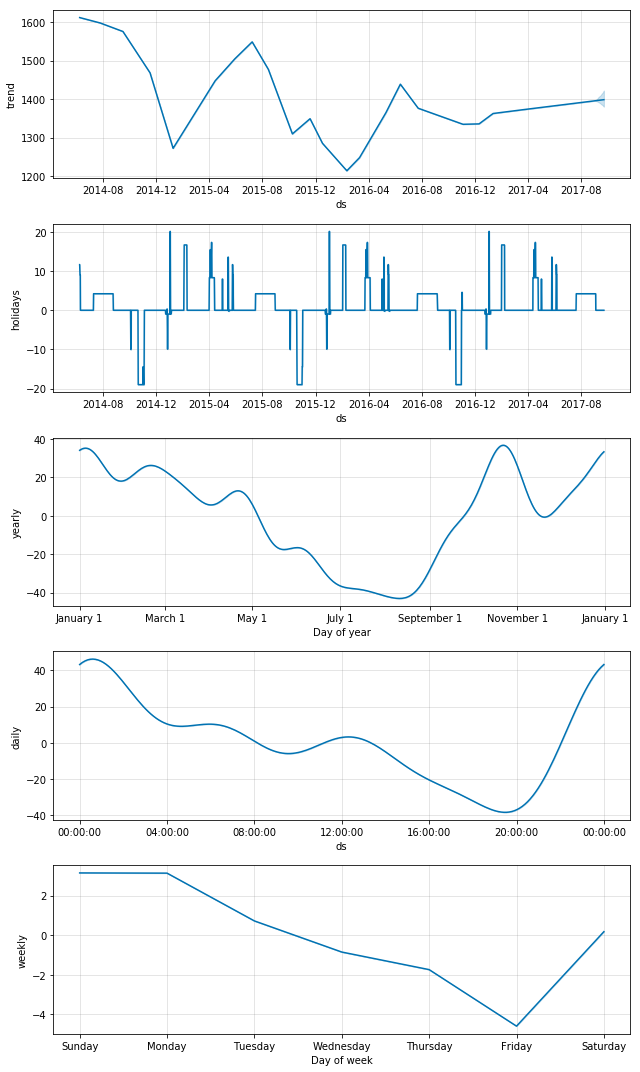

In [2]:
model, df_future, df_forecast = train_and_predict(plot=True)

In [3]:
# Persist the model
pickle_out = open("../models/model.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [4]:
# Set timestamp as index and resample
df_future.set_index(df_future['ds'], inplace=True)
df_future.drop('ds', inplace=True, axis=1)
df_future.head()
df_future = df_future.resample('1H').bfill()
df_future.tail()

,y
ds,
2017-09-21 19:00:00,1339
2017-09-21 20:00:00,1419
2017-09-21 21:00:00,1419
2017-09-21 22:00:00,1419
2017-09-21 23:00:00,1419


In [5]:
# Set timestamp as index and resample
df_forecast = df_forecast[['ds', 'yhat']]
df_forecast.set_index(df_forecast['ds'], inplace=True)
df_forecast.drop('ds', inplace=True, axis=1)
df_forecast = df_forecast.resample('1H').bfill()
df_forecast.tail()

,yhat
ds,
2017-09-21 16:00:00,1368.971074
2017-09-21 17:00:00,1363.345949
2017-09-21 18:00:00,1357.227040
2017-09-21 19:00:00,1352.909397
2017-09-21 20:00:00,1356.416625


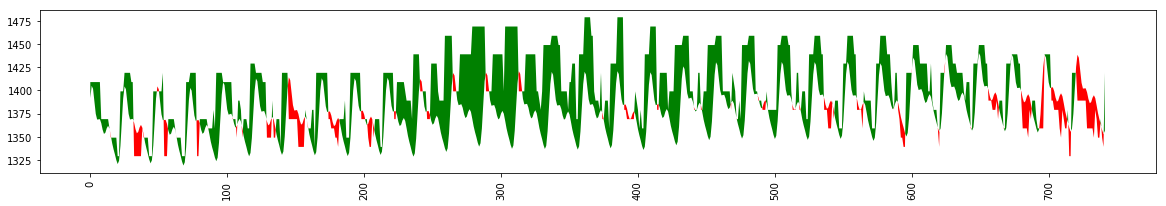

In [6]:
# Only consider common timestamps
import matplotlib.ticker as ticker
common_indices = df_future.index.intersection(df_forecast.index)
y = df_future.loc[common_indices, :].y
yhat = df_forecast.loc[common_indices, :].yhat
plt.fill_between(range(len(common_indices)), y, yhat, where=y >= yhat, facecolor='green', interpolate=True)
plt.fill_between(range(len(common_indices)), y, yhat, where=y < yhat, facecolor='red', interpolate=True)
plt.xticks(rotation=90)
plt.show()

In [7]:
# Evaluate the model using the mean squared error
get_mse(y, yhat)

1919.0552500907784